# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
titanic = pd.read_csv("../data/titanic.csv")
titanic.sample()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
828,829,1.0,3,"McCormack, Mr. Thomas Joseph",male,32.693417,0,0,367228,7.75,U0,Q


#### Explore the titanic dataset using Pandas dtypes.

In [9]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [12]:
titanic.select_dtypes(include=['int64', 'float64']).sample()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
495,496,0.0,3,27.627955,0,0,14.4583


In [13]:
titanic.select_dtypes(include=['object']).sample()

,Name,Gender,Ticket,Cabin,Embarked
92,"Chaffee, Mr. Herbert Fuller",male,W.E.P. 5734,E31,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [17]:
plt.style.use('classic')

plt.figure(figsize=(12, 6));

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

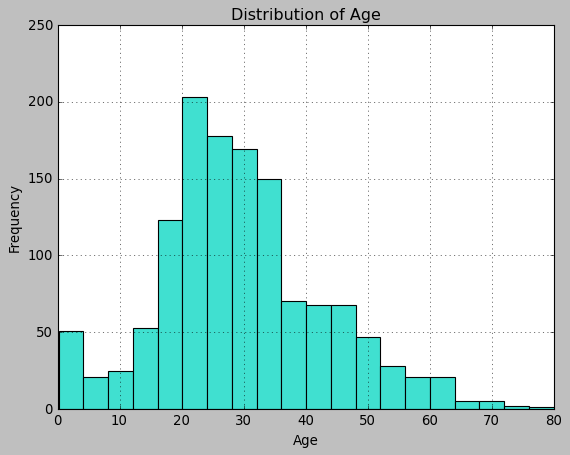

In [76]:
plt.hist(titanic['Age'].dropna(), bins=20, color='turquoise', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
If the bin size is small it's useful for detecting smaller details/patterns/variations in the data
However, it can make it look noisy and harder to interepret (specially for large dtasets)

On the other hand with a large bin size, provides a more genral overview oof the data and can make the distribution easier to underestand.
Makes it dificult to see finr details

The optimal bin size depends on the specific characteristics of ther data and the goals of the analysis.
"""

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

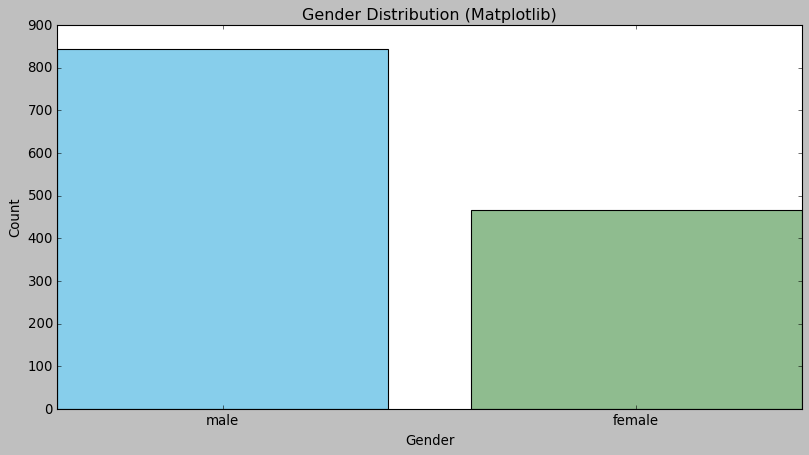

In [27]:
gender_counts = titanic['Gender'].value_counts()
gender_labels = gender_counts.index
gender_values = gender_counts.values

plt.bar(gender_labels, gender_values, color=['skyblue', 'darkseagreen'])
plt.title('Gender Distribution (Matplotlib)')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


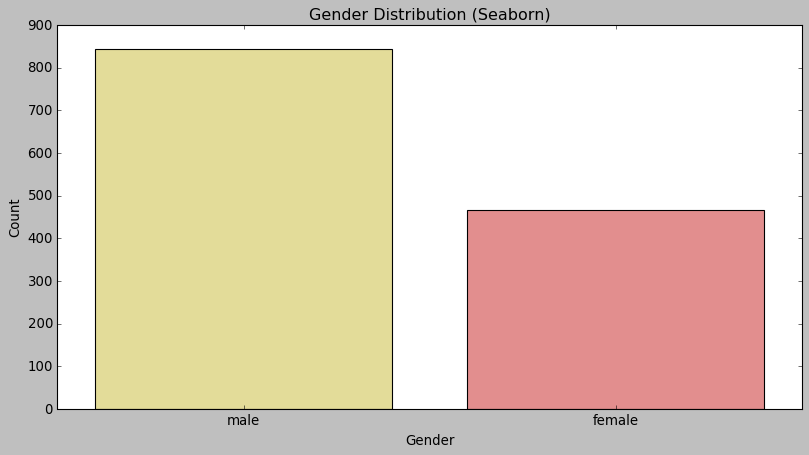

In [31]:
sns.countplot(data=titanic, x='Gender', palette=['khaki', 'lightcoral'])
plt.title('Gender Distribution (Seaborn)')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

#### Use the right plot to visualize the column `Pclass`.

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


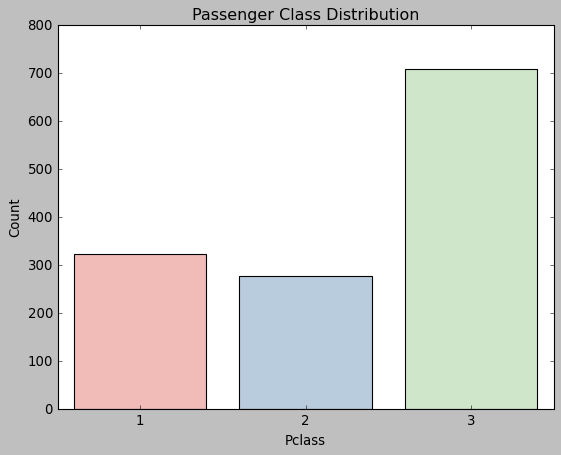

In [34]:
sns.countplot(data=titanic, x='Pclass', palette='Pastel1')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it and list all the info it's giving you.

[Hint](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


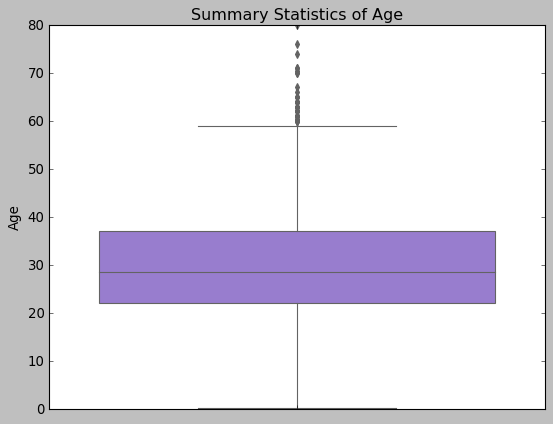

In [38]:
sns.boxplot(data=titanic, y='Age', color='mediumpurple')
plt.title('Summary Statistics of Age')
plt.ylabel('Age')

plt.show()

In [ ]:
"""
So the box plot shows where the majority of the people fall in, which is the purple box part (between 22 and 38 more or less). It kind of represents the moda.
Then we got the minimum and the maximum (without counting outliers) represented by two lines between 0 ands somewhere near 60 years old
There are som dots above 60 years old which represent the outliers.
Finally there's a line in the box that represents the median just below 30 years olld.
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

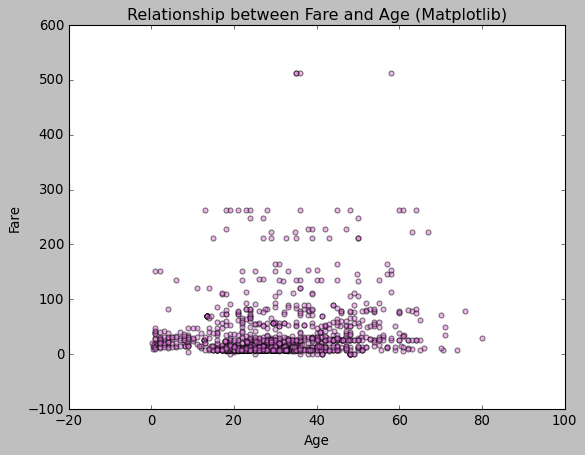

In [54]:
plt.scatter(titanic['Age'], titanic['Fare'], c='orchid', alpha=0.5)
plt.title('Relationship between Fare and Age (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

Text(0, 0.5, 'Fare')

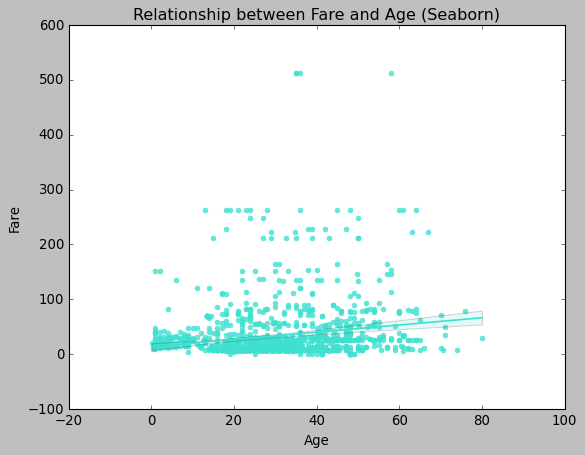

In [53]:
sns.regplot(data=titanic, x='Age', y='Fare', color='turquoise',)
plt.title('Relationship between Fare and Age (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Fare')

#### Plot the correlation matrix using seaborn.

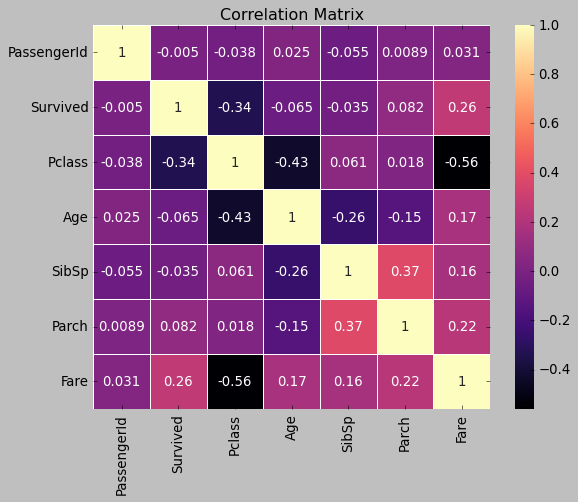

In [67]:
numeric_columns = titanic.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

#### What are the most correlated features?

In [ ]:
"""
The class and the calss are farely correlated but in negative number which means that when one of the two values increases the other decreases
So when the class decreases (gets closer to first class). The price increases

We can also see that there are some negative correlation also with Class and age, family members abord(SibSp/Parch) and age,
and the one that stands to me the most, class and ratio of survival have a negative ahve a negative correlation of -0.34.

There's also some positive correlations between Parents/Children Abord and Siblings/Spose Abord.
Fare and survivors also ahve a positive correlation of 0.26 which makes sense if we think abaout the negative correlation with surved and class.

Conclusion: The more the people paid the more chances they would have to survive
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


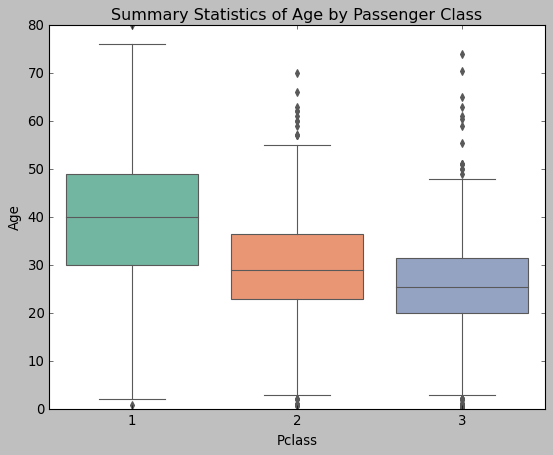

In [71]:
sns.boxplot(data=titanic, x='Pclass', y='Age', palette='Set2')
plt.title('Summary Statistics of Age by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oriol\miniconda3\envs\ironhack\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

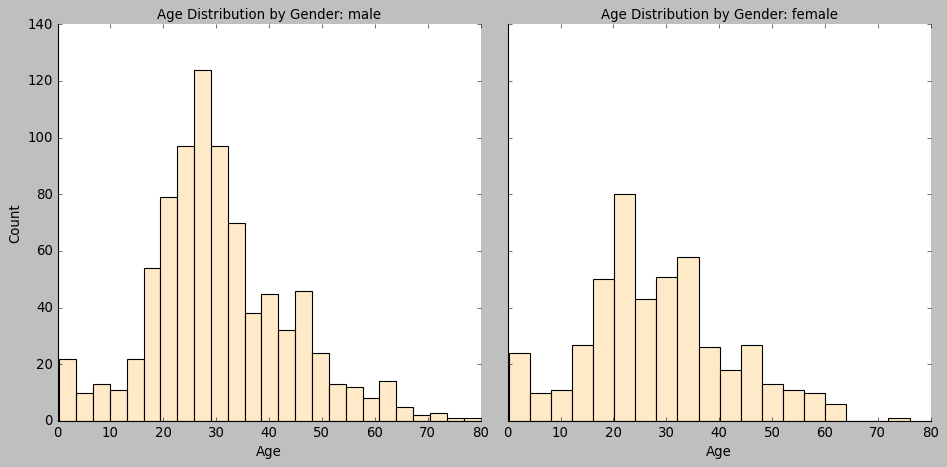

In [90]:
g = sns.FacetGrid(titanic, col="Gender", height=6)

g.map(sns.histplot, "Age", color="moccasin")

g.set_axis_labels("Age", "Count")
g.set_titles("Age Distribution by Gender: {col_name}")

plt.show()